In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("training.csv",delimiter = ";",decimal=",")
df_val = pd.read_csv("validation.csv",delimiter = ";",decimal=",")

In [3]:
df_majority = df[df.classLabel == "yes."]
df_minority = df[df.classLabel == "no."]

In [4]:
df_majority.shape

(3424, 19)

In [5]:
from sklearn.utils import resample

In [6]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=3424,
                                 random_state=32)

In [7]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [8]:
y = df_upsampled.classLabel.replace("no.",0).replace("yes.",1)
y_val = df_val.classLabel.replace("no.",0).replace("yes.",1) 

In [9]:
df_upsampled.drop("classLabel",axis=1,inplace=True)
df_val.drop("classLabel",axis=1,inplace=True)

In [10]:
df_upsampled

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19
39,a,47.25,0.000075,u,g,q,h,2.750,t,t,1,f,g,333.0,892,3330000.0,NaN,1
40,a,33.67,0.000037,u,g,cc,v,0.375,f,f,0,f,g,300.0,44,3000000.0,NaN,1
41,b,45.00,0.000850,u,g,cc,h,14.000,t,t,1,t,g,88.0,2000,880000.0,t,1
42,b,33.17,0.000104,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,1640000.0,NaN,1
43,a,25.00,0.000087,u,g,x,h,1.040,t,f,0,t,g,160.0,5860,1600000.0,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,a,40.33,0.000812,y,p,k,v,0.165,f,t,2,f,g,NaN,18,NaN,NaN,0
12,a,18.17,0.001000,y,p,q,h,0.165,f,f,0,f,g,340.0,0,3400000.0,f,0
93,a,31.92,0.000313,u,g,ff,ff,3.040,f,t,2,t,g,200.0,4,2000000.0,NaN,0
347,b,52.42,0.000150,u,g,d,v,3.750,f,f,0,t,g,0.0,350,0.0,f,0


In [11]:
df = pd.concat([df_upsampled,df_val]).reset_index()

df.drop("index",axis=1,inplace=True)

In [12]:
df.shape

(7048, 18)

In [13]:
float_cols = ["variable2","variable3","variable8","variable17"]

In [14]:
df.drop("variable14",axis=1,inplace=True)

In [15]:
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]

In [16]:
X = df[:6848]
X_val = df[6848:].reset_index()

X_val.drop("index",axis=1,inplace=True)

X_val

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable15,variable17,variable18,variable19
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,0,4200000.0,NaN,1
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,1,1360000.0,NaN,0
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,3,2400000.0,NaN,1
3,b,18.42,0.001041,y,p,aa,v,0.125,t,f,0,f,g,375,1200000.0,NaN,0
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,475,1200000.0,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,23.08,0.001150,u,g,i,v,3.500,t,t,9,f,g,742,560000.0,t,0
196,a,57.08,0.001950,u,g,c,v,5.500,t,t,7,f,g,3000,0.0,NaN,1
197,b,30.83,0.000000,u,g,W,v,1.250,t,t,1,f,g,0,2020000.0,NaN,0
198,b,19.67,0.000037,u,g,q,v,2.000,t,t,2,t,g,0,800000.0,t,1


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
float_features = float_cols
float_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))])

In [19]:
categorical_features = categorical_cols
categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder())])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('float', float_transformer, float_features),
        ('cat', categorical_transformer, categorical_features)])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                   ("scaler",StandardScaler()),
                    #  ("pca",PCA(n_components = 26))
                  ('classifier',LGBMClassifier(learning_rate = 0.525, n_estimators = 200))]) 

In [22]:
clf.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('float',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['variable2', 'variable3',
                                                   'variable8', 'variable17']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['variable1', 'variable4',
                                                   'variable5', 'variable6',
       

In [23]:
clf.score(X_val,y_val)

0.88

In [24]:
import matplotlib.pyplot as plt

importance = clf["classifier"].feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 345.00000
Feature: 1, Score: 338.00000
Feature: 2, Score: 289.00000
Feature: 3, Score: 325.00000
Feature: 4, Score: 27.00000
Feature: 5, Score: 1.00000
Feature: 6, Score: 9.00000
Feature: 7, Score: 32.00000
Feature: 8, Score: 19.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 24.00000
Feature: 13, Score: 10.00000
Feature: 14, Score: 22.00000
Feature: 15, Score: 14.00000
Feature: 16, Score: 6.00000
Feature: 17, Score: 3.00000
Feature: 18, Score: 3.00000
Feature: 19, Score: 12.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 6.00000
Feature: 22, Score: 10.00000
Feature: 23, Score: 22.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 11.00000
Feature: 26, Score: 6.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 9.00000
Feature: 29, Score: 16.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 2.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 36.00000
Feature: 34, Score: 0.00000
Feature: 

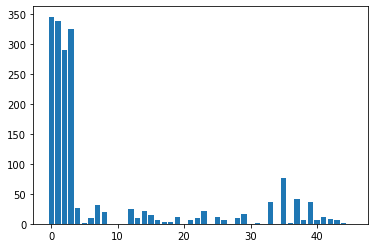

In [25]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predicted = clf.predict(X_val)

In [27]:
results = confusion_matrix(y_val, predicted)

In [28]:
print('Confusion Matrix :\n')
print(results) 
print('\nAccuracy Score :',accuracy_score(y_val, predicted)) 
print('\nReport :')
print(classification_report(y_val, predicted)) 

Confusion Matrix :

[[90 17]
 [ 7 86]]

Accuracy Score : 0.88

Report :
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       107
           1       0.83      0.92      0.88        93

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

